#  作業

Hint: 人物原始邊框座標 (60, 40), (420, 510)

請根據 Lena 圖做以下處理

- 對明亮度做直方圖均衡處理
- 水平鏡像 + 縮放處理 (0.5 倍)
- 畫出人物矩形邊框
- 並且得到新的矩形邊框座標

In [1]:
import cv2
import numpy as np

In [2]:
img_path = '../images/lena.png'
img_bgr = cv2.imread( img_path  )

## Hint: 矩形

In [ ]:
img_rect = img_bgr.copy()
cv2.rectangle( img_rect, (60, 40), (420, 510), (0, 255, 0), 3 )

while True:
    cv2.imshow( 'Rectangle', img_rect )
    cv2.imwrite( 'Rectangle.jpg', img_rect )
    
    k = cv2.waitKey(0)
    if k == 27:
        cv2.destroyAllWindows()
        break

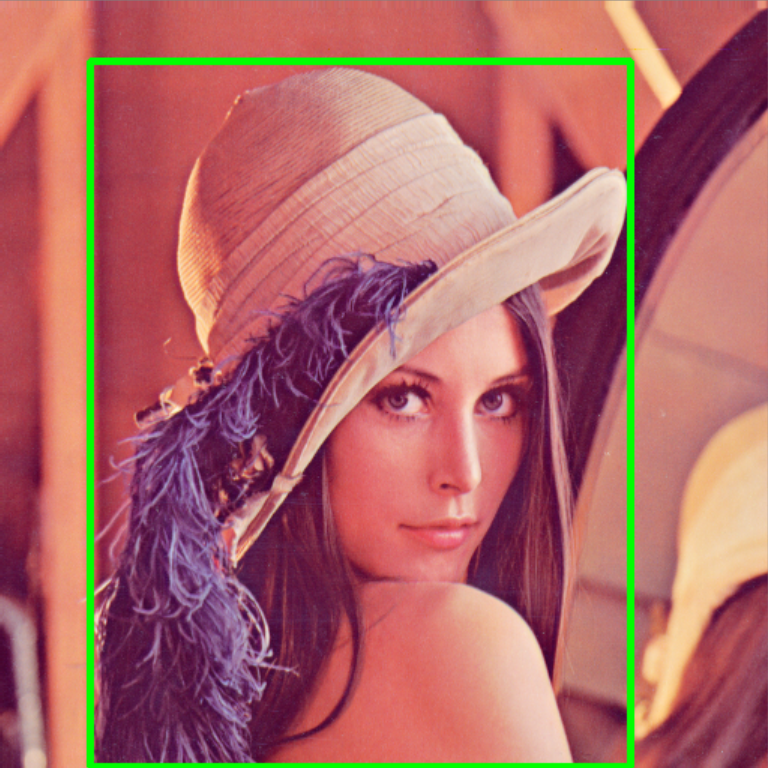

## Hint: 線

In [ ]:
img_line = img_bgr.copy()
cv2.line( img_line, (60, 40), (420, 510), (255, 255, 255), 3 )

while True:
    cv2.imshow( 'White Line', img_line )
    cv2.imwrite( 'White_Line.jpg', img_line )
    
    k = cv2.waitKey(0)
    if k == 27:
        cv2.destroyAllWindows()
        break

## Hint: 文字

In [ ]:
img_text = img_bgr.copy()
cv2.putText( img_text, '(60, 40)', (60, 40), 0, 1, (0, 0, 0), 2 )

while True:
    cv2.imshow( 'Add Black Text', img_text )
    cv2.imwrite( 'Add_Black_Text.jpg', img_text )
    
    k = cv2.waitKey(0)
    if k == 27:
        cv2.destroyAllWindows()
        break

In [ ]:
img_hw = img_bgr.copy()
point1 = [60, 40]
point2 = [420, 510]

"""
對明亮度做直方圖均衡
"""
# 原始 BGR 圖片轉 HSV 圖片
img_hw = cv2.cvtColor( img_hw, cv2.COLOR_BGR2HSV )

# 對明亮度做直方圖均衡 -> 對 HSV 的 V 做直方圖均衡
img_hw[ ..., -1 ] = cv2.equalizeHist( img_hw[ ..., -1 ] )

# 將圖片轉回 BGR
img_hw = cv2.cvtColor( img_hw, cv2.COLOR_HSV2BGR )

"""
水平鏡像
"""
h, w = img_hw.shape[:2]

# 圖片鏡像
img_hw = img_hw[ :, ::-1, : ]

# 透過四則運算計算鏡像後位置
# 確保點的位置一樣是左上跟右下，所以交換鏡像後的 x 座標 (y 座標做水平鏡像後位置不變)
point1[0] = w-point1[0]
point2[0] = w-point2[0]
point1[0], point2[0] = point2[0], point1[0]

"""
縮放處理 (0.5 倍)
"""
fx = 0.5
fy = 0.5
resize_col = int( img_hw.shape[1]*fx )
resize_row = int( img_hw.shape[0]*fy )

# 建構 scale matrix
M_scale = np.array( [[0.5, 0, 0],[0, 0.5, 0]], dtype=np.float32 )
img_hw = cv2.warpAffine( img_hw, M_scale, (resize_col, resize_row) )

# 把左上跟右下轉為矩陣型式
bbox = np.array((point1, point2), dtype=np.float32)
#print('M_scale.shape={}, bbox.shape={}'.format(M_scale.shape, bbox.shape))

# 做矩陣乘法可以使用 `np.dot`, 為了做矩陣乘法, M_scale 需要做轉置之後才能相乘
homo_coor_result = np.dot(M_scale.T, bbox)
homo_coor_result = homo_coor_result.astype('uint8')
#print(homo_coor_result)
scale_point1 = tuple(homo_coor_result[0])
scale_point2 = tuple(homo_coor_result[1])
print('origin point1={}, origin point2={}'.format(point1, point2))
print('resize point1={}, resize point2={}'.format(scale_point1, scale_point2))

# 畫圖
cv2.rectangle(img_hw, scale_point1, scale_point2, (0, 0, 255), 3)

while True:
    cv2.imshow( 'detected', img_hw )
    cv2.imwrite( 'detected.jpg', img_hw )
    
    k = cv2.waitKey(0)
    if k == 27:
        cv2.destroyAllWindows()
        break